# GloVe Embedding 

### Loading files

In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'vectors.txt'

In [5]:
word2vec_output_file = 'converted.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

(20804, 50)

In [7]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [33]:
model.save('glove_model')

## checking for the similar cases 

In [11]:
kingV = model['king']
manV = model['man']
womanV= model['woman']

In [12]:
resultant = kingV - manV + womanV

In [18]:
model.most_similar([resultant], topn = 5)

[('king', 0.7987476587295532),
 ('abdullah', 0.6389999985694885),
 ('lear', 0.6379509568214417),
 ('mervyn', 0.6308215856552124),
 ('gul', 0.6078253984451294)]

In [20]:
parisV = model['paris']
franceV = model['france']
germanyV = model['germany']

In [21]:
resultant = parisV - franceV + germanyV

In [22]:
model.most_similar([resultant], topn=5)

[('paris', 0.8688083291053772),
 ('berlin', 0.8423300981521606),
 ('london', 0.7227962017059326),
 ('wall', 0.654655933380127),
 ('rome', 0.6532195806503296)]

## Plotting the graphs

In [23]:
from sklearn.manifold import TSNE
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    #labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

<ipython-input-23-281a7151b5ff>:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in model.wv.vocab:
<ipython-input-23-281a7151b5ff>:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vectors.append(model.wv[word])


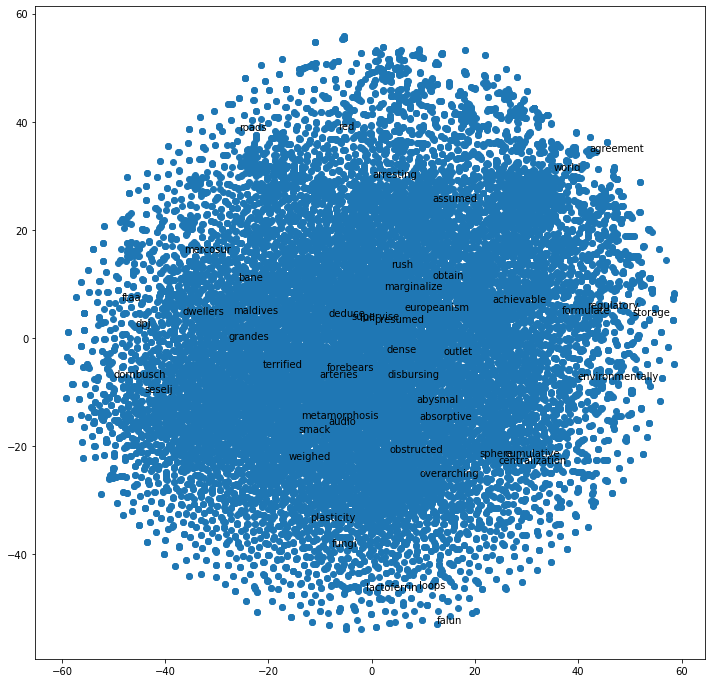

In [24]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)
    
    #
    # Label randomly subsampled 100 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 50)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_function = plot_with_matplotlib


plot_function(x_vals, y_vals, labels)

In [27]:
keys = ['paris', 'sunday', 'tolstoy', 'twitter', 'grandes', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

<ipython-input-32-607a687e5473>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in list(model.wv.vocab):
<ipython-input-32-607a687e5473>:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  embeddings.append(model.wv[word])


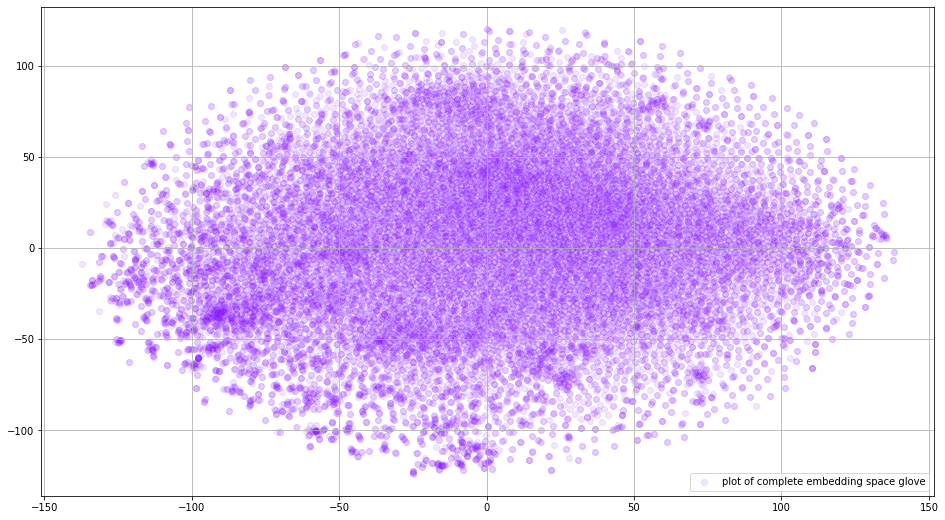

In [32]:
words = []
embeddings = []
for word in list(model.wv.vocab):
    embeddings.append(model.wv[word])
    words.append(word)
    
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("complete_plot_glove.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('plot of complete embedding space glove', embeddings_2d, a=0.1)

### Plotting PCA

In [29]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(pca_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

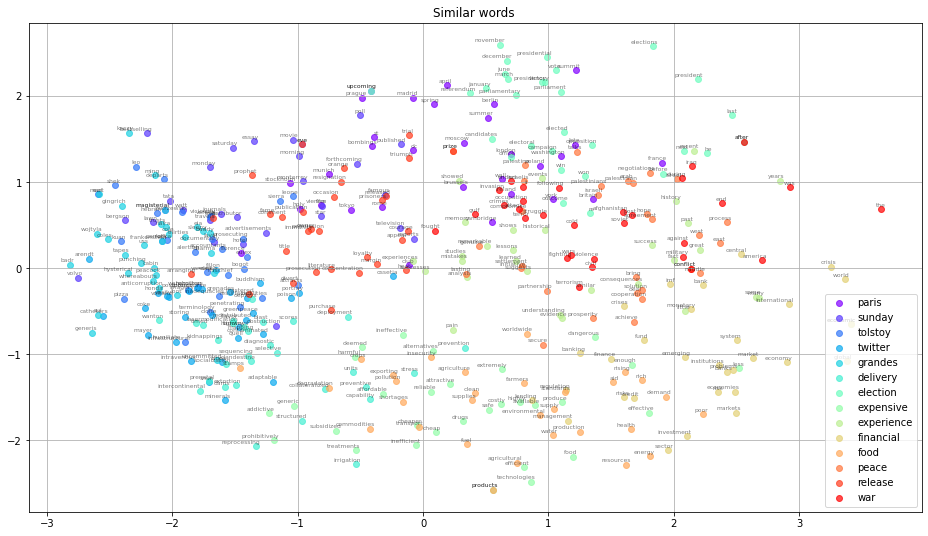

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def PCAplot(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=6)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


PCAplot('Similar words ', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

<ipython-input-31-33cef1db1b6f>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  X = model.wv[model.wv.vocab]
<ipython-input-31-33cef1db1b6f>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  words = list(model.wv.vocab)


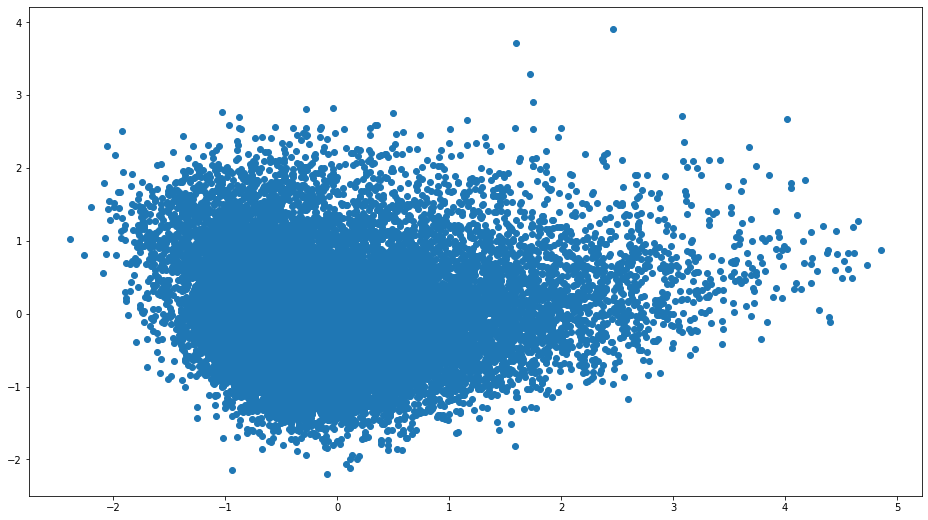

In [31]:
X = model.wv[model.wv.vocab]
plt.figure(figsize=(16,9))
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
plt.show()